
**<h1 style="background-color: green; padding: 10px;">Part 1: Data Analysis and Visualization</h1>**

---

#### **1. Visualization Tasks**

**Importing libraries and discovering the data**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\Shahed\OneDrive - Hashemite University\ML_project\CO2 Emissions2.csv") 
df.head()

,Make,Model,'Vehicle Class','Engine Size(L)',Cylinders,Transmission,'Fuel Type','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)'
0,MASERATI,'QUATTROPORTE S',FULL-SIZE,3.0,6,AS8,Z,14.9,10.3,13.1,22,300
1,TOYOTA,'Camry AWD XLE/XSE',MID-SIZE,2.5,4,AS8,X,9.5,7.0,8.4,34,197
2,VOLKSWAGEN,'GOLF SPORTWAGON TDI (modified)','STATION WAGON - SMALL',2.0,4,AM6,D,7.6,5.6,6.7,42,180
3,PORSCHE,'911 Targa 4 GTS',MINICOMPACT,3.0,6,AM7,Z,12.1,9.2,10.8,26,251
4,HONDA,'Passport AWD','SUV - SMALL',3.5,6,A9,X,12.5,9.8,11.3,25,265


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Make                                7385 non-null   object 
 1   Model                               7385 non-null   object 
 2   'Vehicle Class'                     7385 non-null   object 
 3   'Engine Size(L)'                    7385 non-null   float64
 4   Cylinders                           7385 non-null   int64  
 5   Transmission                        7385 non-null   object 
 6   'Fuel Type'                         7385 non-null   object 
 7   'Fuel Consumption City (L/100 km)'  7385 non-null   float64
 8   'Fuel Consumption Hwy (L/100 km)'   7385 non-null   float64
 9   'Fuel Consumption Comb (L/100 km)'  7385 non-null   float64
 10  'Fuel Consumption Comb (mpg)'       7385 non-null   int64  
 11  'CO2 Emissions(g/km)'               7385 no

In [3]:
#removing the '' from the columns names to make using them easier
df.columns = df.columns.str.replace('\'', '').str.replace('\"', '').str.strip()

In [4]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.164672,5.596479,12.489248,9.004130,10.920799,27.610427,249.450914
std,1.369478,1.828195,3.479281,2.206989,2.872763,7.309926,58.152814
min,0.900000,3.000000,4.200000,4.200000,4.200000,11.000000,99.000000
25%,2.000000,4.000000,10.000000,7.400000,8.900000,22.000000,207.000000
50%,3.000000,6.000000,12.000000,8.700000,10.500000,27.000000,244.000000
75%,3.700000,6.000000,14.500000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.300000,20.500000,25.900000,67.000000,522.000000


**Handling outliers and showing them in boxplots**

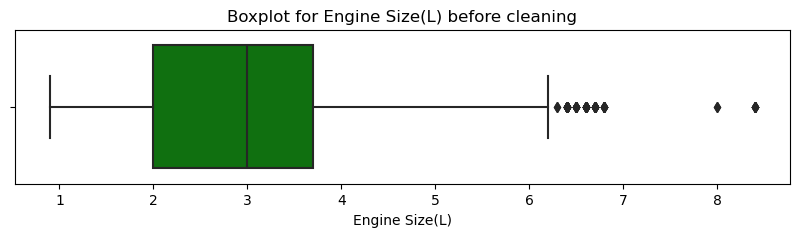

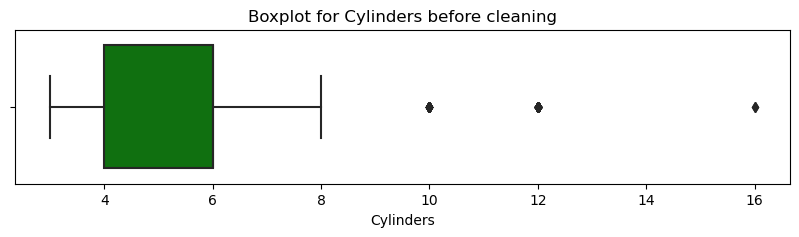

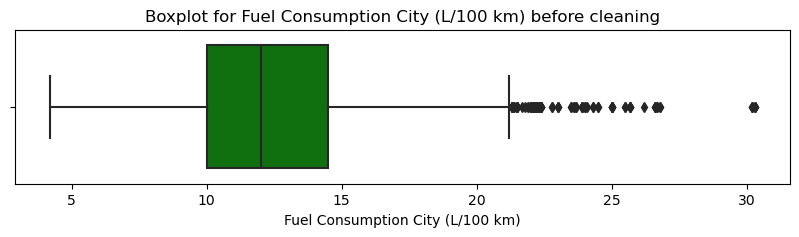

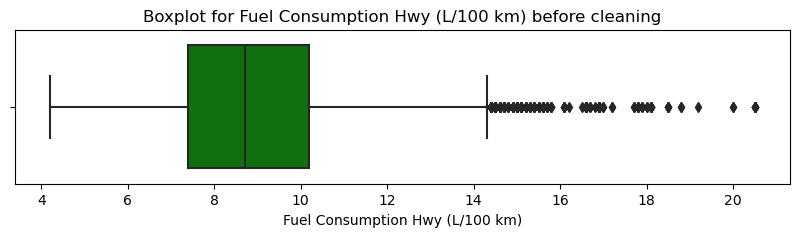

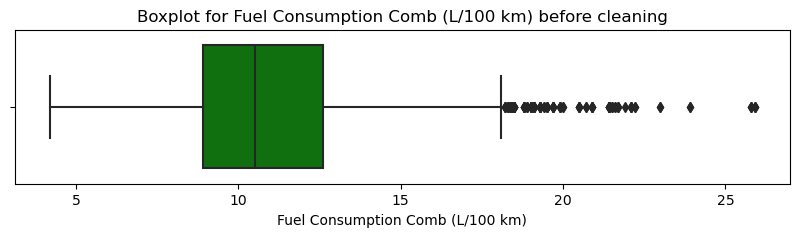

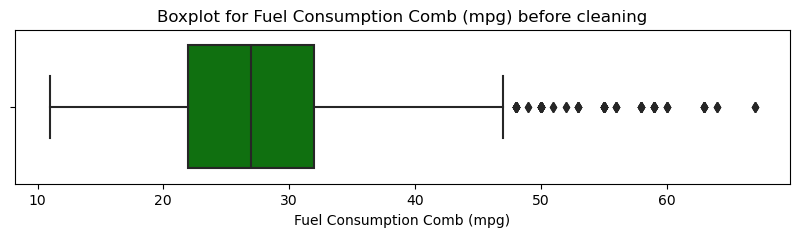

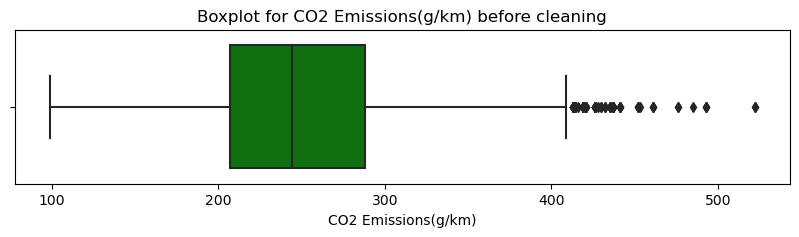

In [5]:
col_numeric = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()

for column in col_numeric:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[column],color='Green')
    plt.title(f"Boxplot for {column} before cleaning")
    plt.show()

In [6]:
from sklearn.ensemble import IsolationForest
numeric_columns = df.select_dtypes(include=['number'])

iso_forest = IsolationForest(contamination=0.26)
outliers = iso_forest.fit_predict(numeric_columns)

outliers_count = (outliers == -1).sum()

original_count = len(df)

df_filtered = df[outliers == 1]
filtered_count = len(df_filtered)

deleted_count = original_count - filtered_count

print(f"Original number of rows: {original_count}")
print(f"Number of rows after removal: {filtered_count}")
print(f"Number of outliers removed: {deleted_count}")


Original number of rows: 7385
Number of rows after removal: 5468
Number of outliers removed: 1917


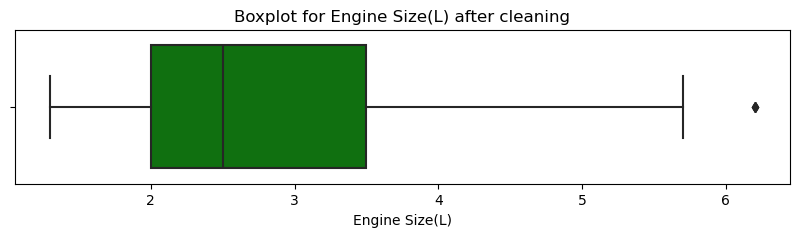

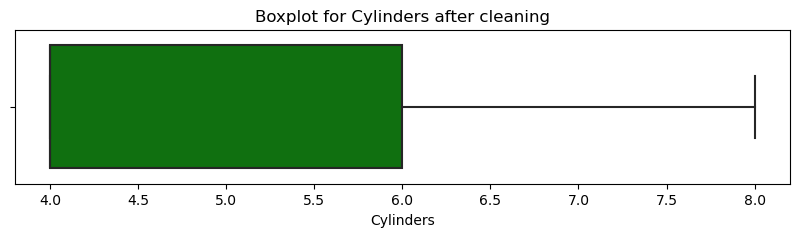

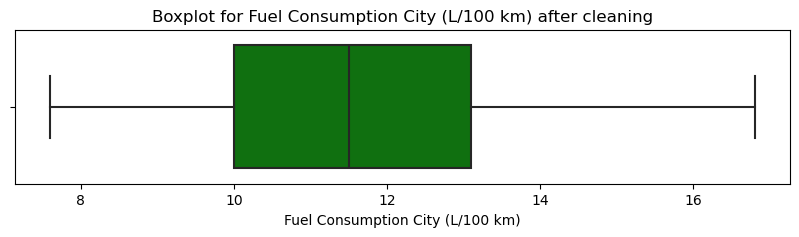

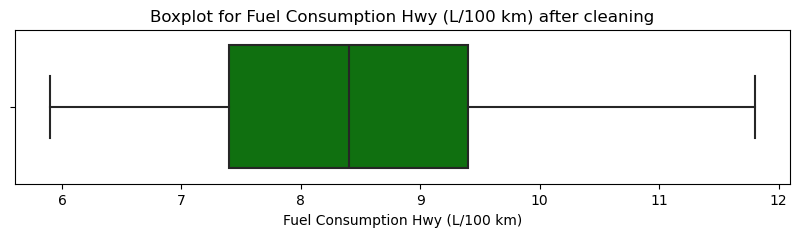

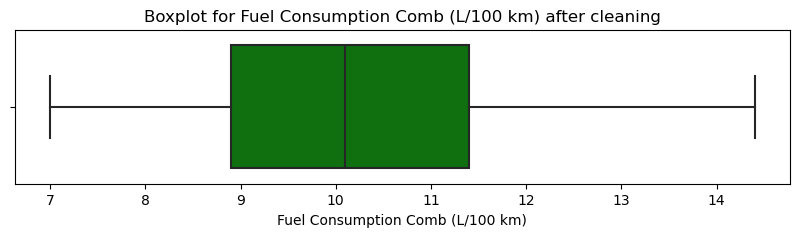

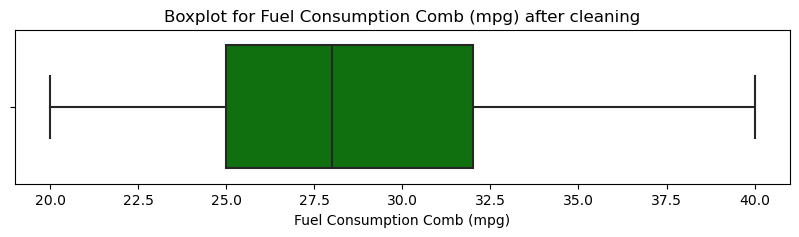

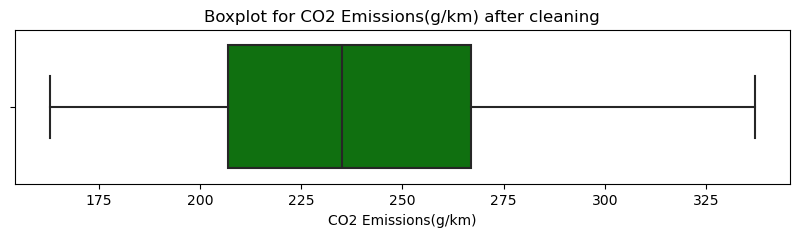

In [7]:
col_numeric = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()

for column in col_numeric:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df_filtered[column],color='Green')
    plt.title(f"Boxplot for {column} after cleaning")
    plt.show()

---

**Visualizeing the relationships between Engine Size, Fuel Consumption, and CO₂ Emissions using** **<span style="color:darkgreen ;">scatterplots and pair plots.</span>**<br>

c:\Users\Shahed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shahed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shahed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shahed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

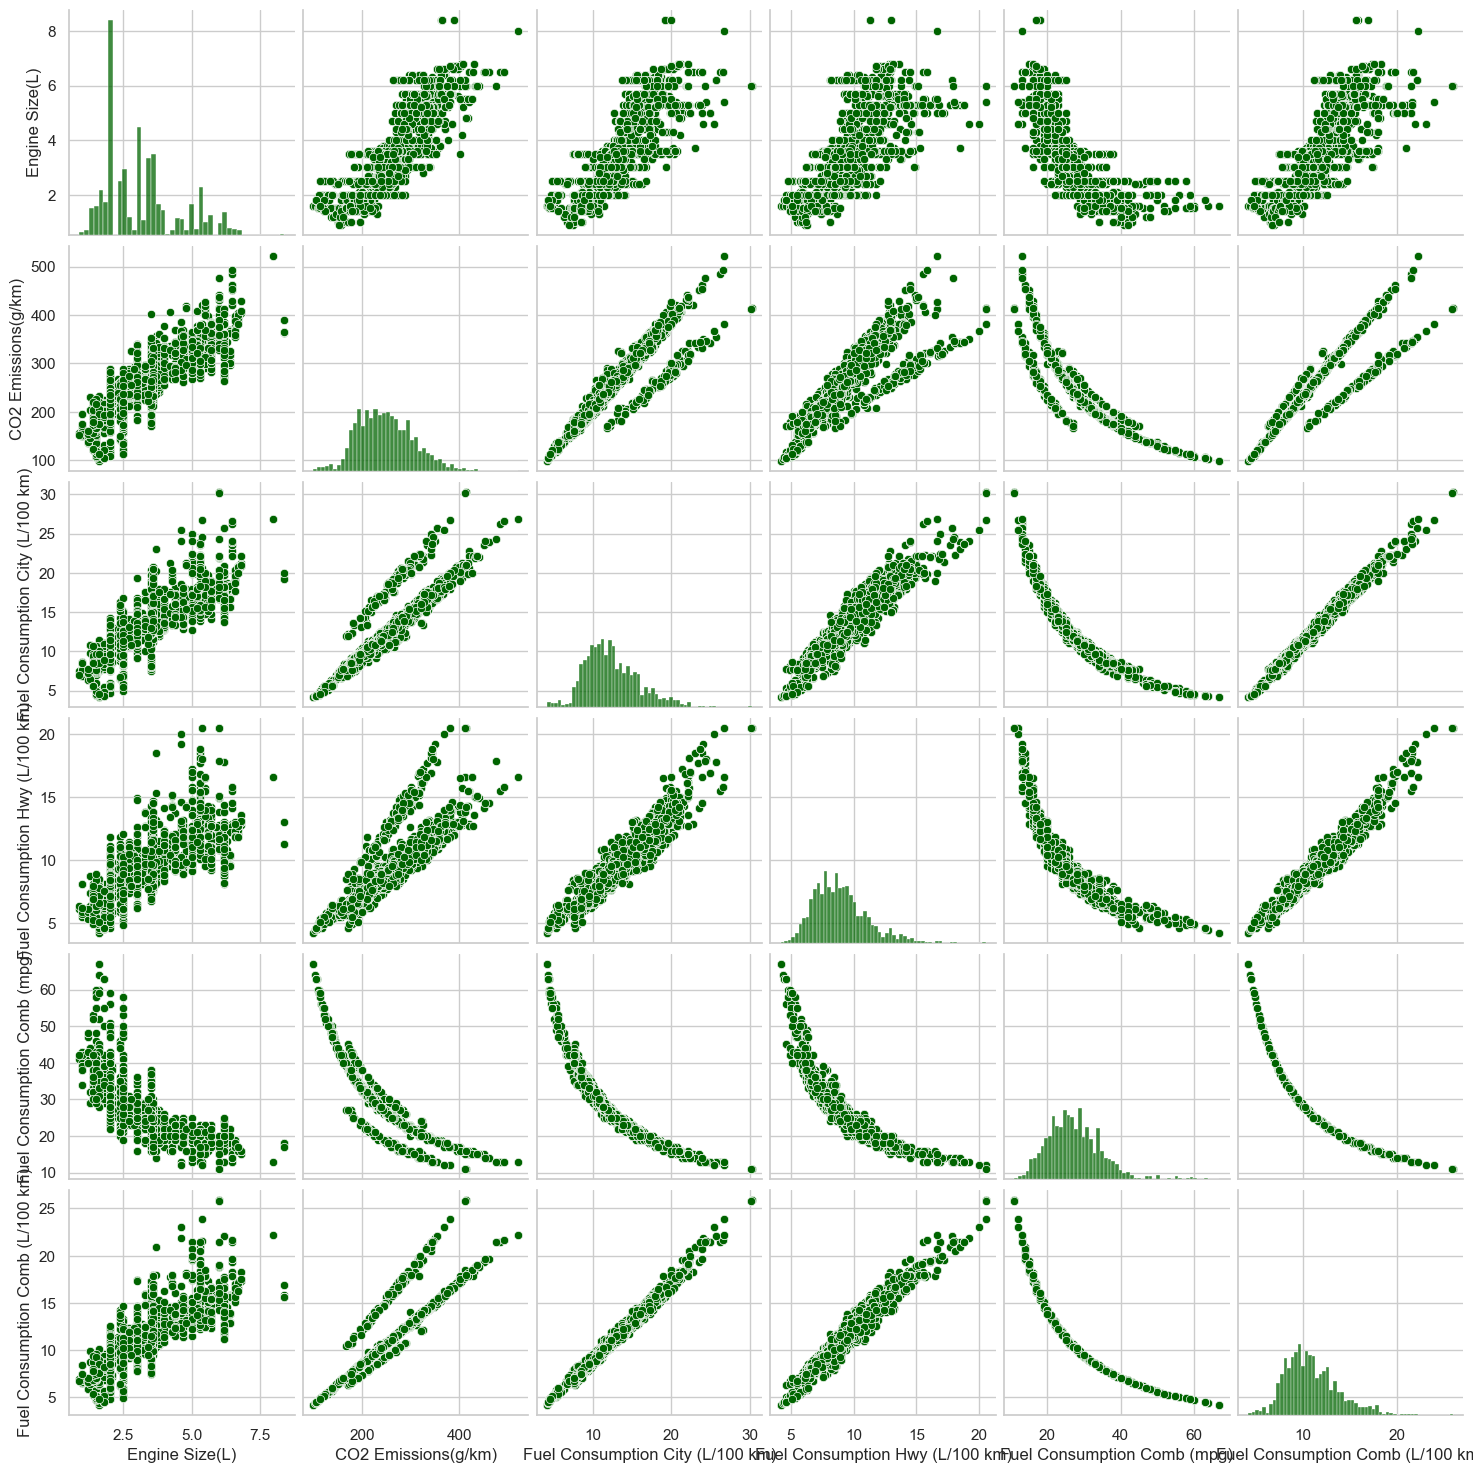

In [8]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
sns.set(style="whitegrid")
sns.set_palette(sns.color_palette(["#006400", "#228B22", "#32CD32", "#00FF00"]))

pair_df=df[["Engine Size(L)" , "CO2 Emissions(g/km)" , "Fuel Consumption City (L/100 km)" , 
      "Fuel Consumption Hwy (L/100 km)" , "Fuel Consumption Comb (mpg)" , "Fuel Consumption Comb (L/100 km)"]]
sns.pairplot(pair_df)
plt.show()

---

**Visualizeing the relationships between Engine Size, and CO₂ Emissions using scatterplots and pair 
plots **<span style="color:darkgreen ;">and grouping the fuel type.</span>****

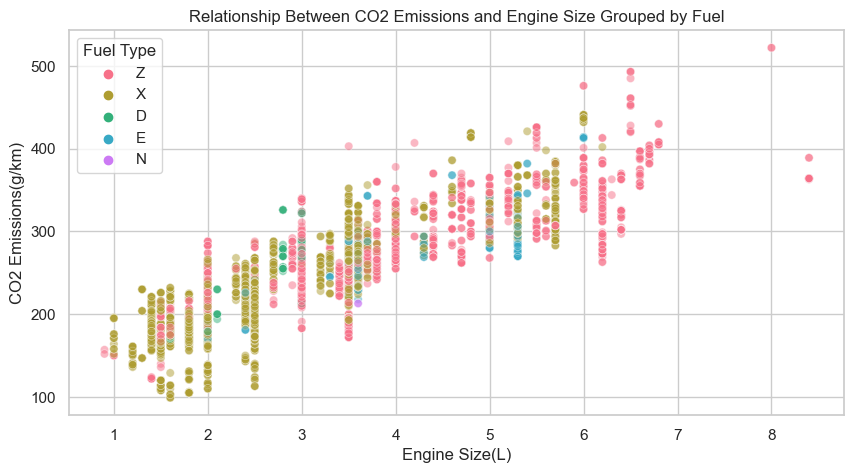

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Engine Size(L)" , y="CO2 Emissions(g/km)", data=df , color='lightgreen' , alpha=0.5,hue='Fuel Type')
plt.title("Relationship Between CO2 Emissions and Engine Size Grouped by Fuel")
plt.show()

---

**Using **<span style="color:darkgreen ;">bar plots or histograms</span>** to explore categorical variables (categorical features visulaizatoins).**

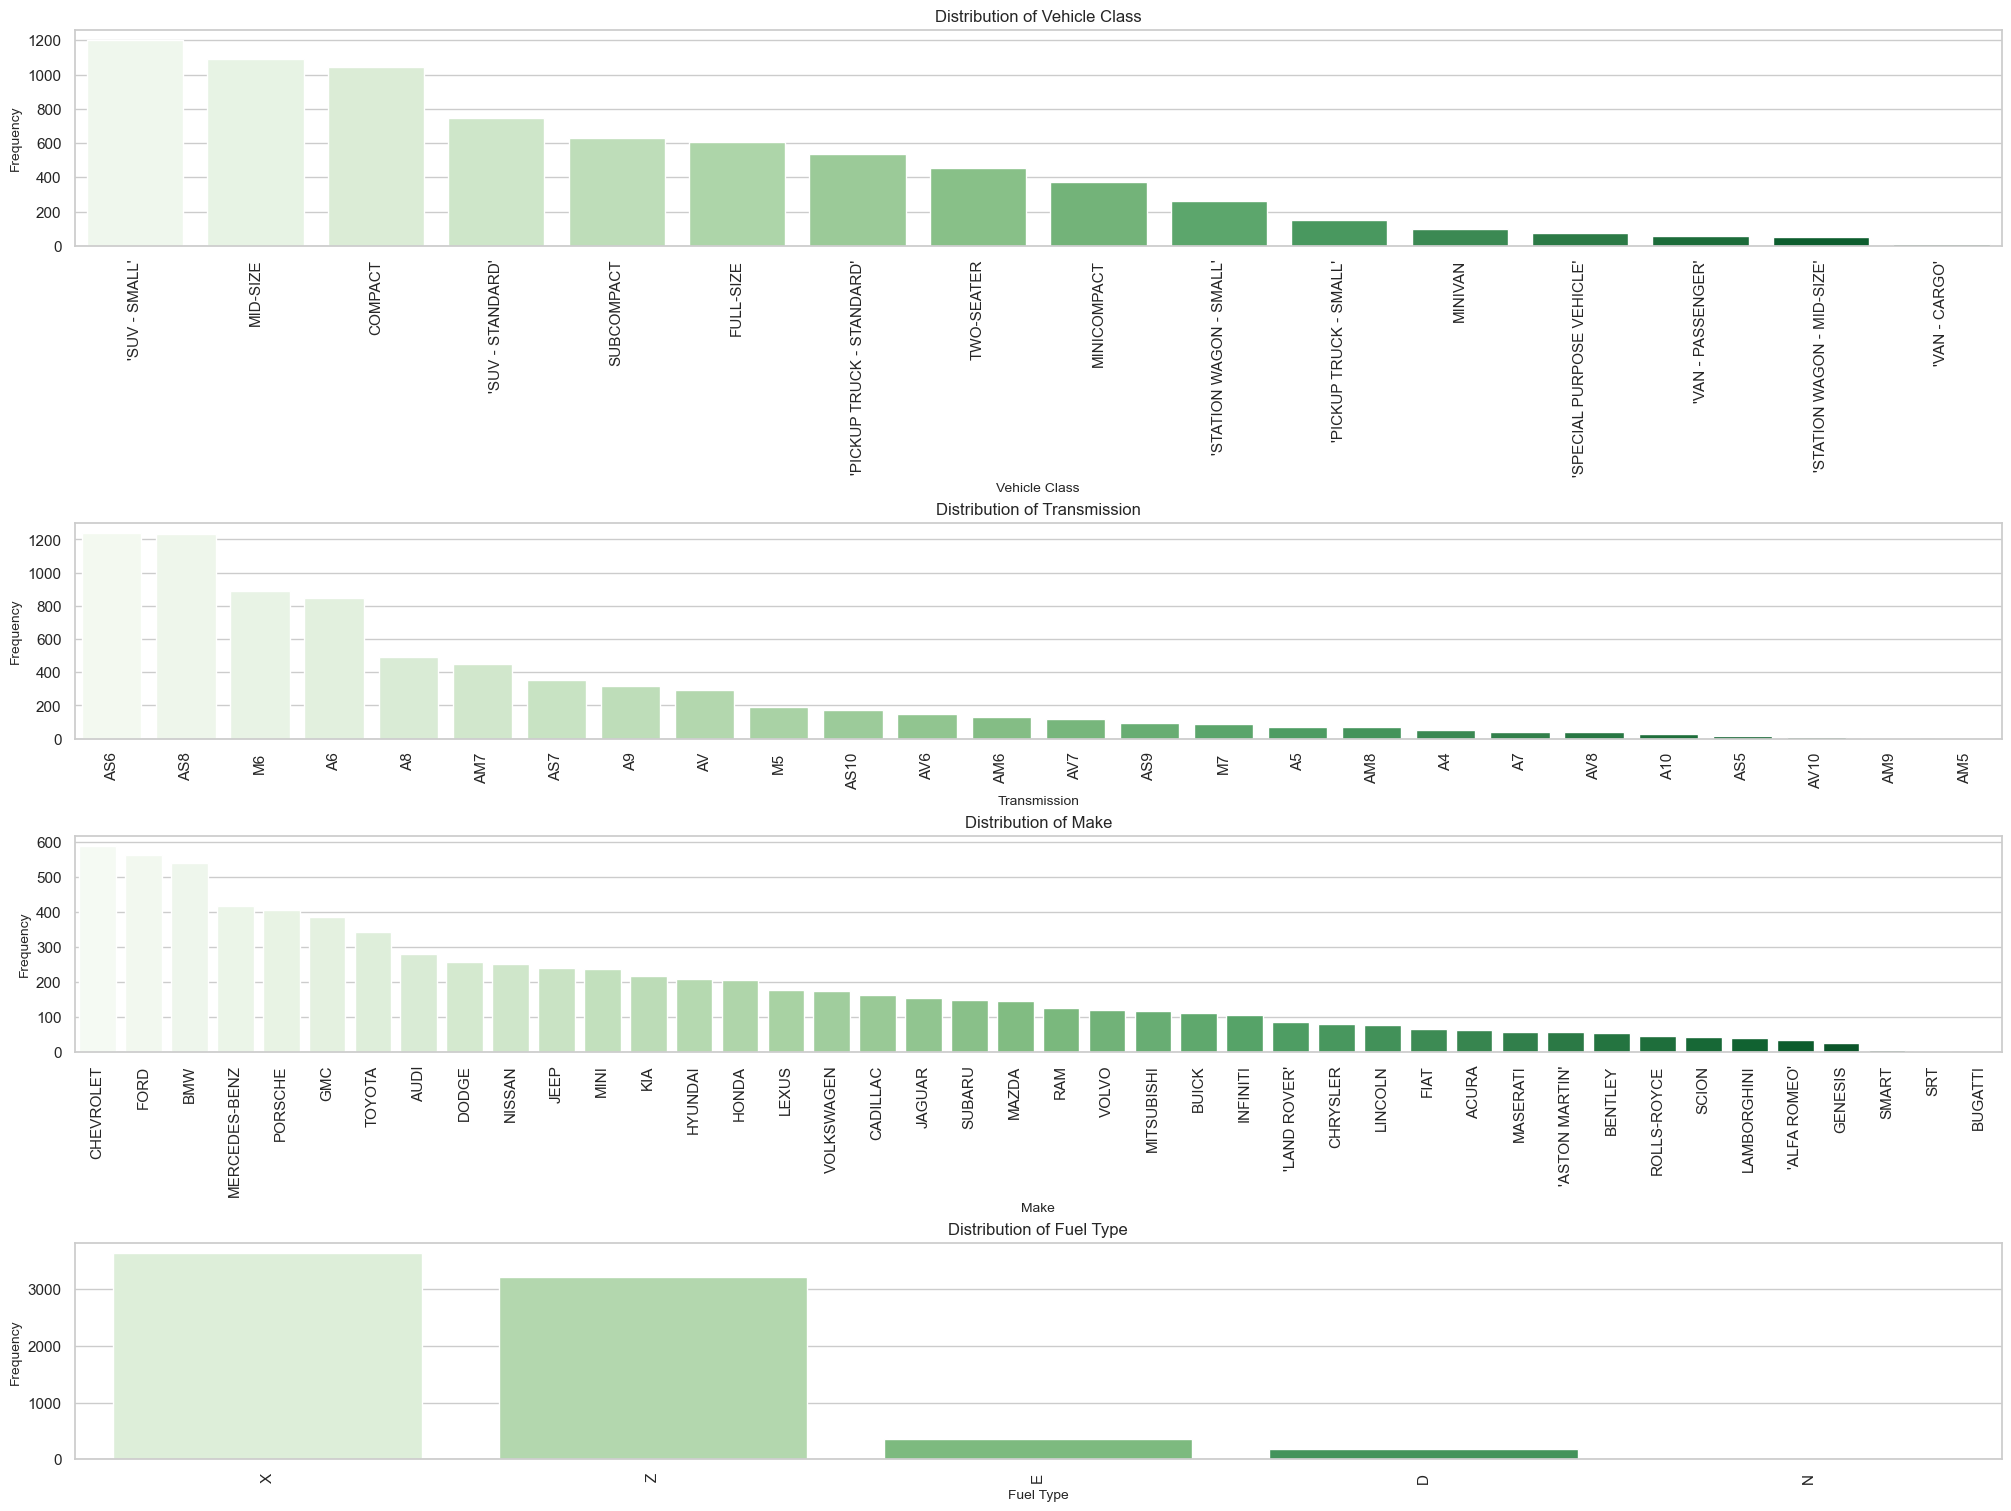

In [10]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")
cat_col = ['Vehicle Class', 'Transmission', 'Make', 'Fuel Type']
n_cols = 1
n_rows = -(-len(cat_col) // n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()
for i, column in enumerate(cat_col):
    avg_co2_vehicle_class=df.groupby(f"{column}")["CO2 Emissions(g/km)"].mean().reset_index()
    value_counts = df[column].value_counts()  
    sns.barplot(x=value_counts.index, y=value_counts.values, data=avg_co2_vehicle_class,palette="Greens", ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column.replace('_', ' '), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)
plt.show()

---

**Useing bar plots to understrand the relationship between categorical features and the CO2 Emissions column average.**

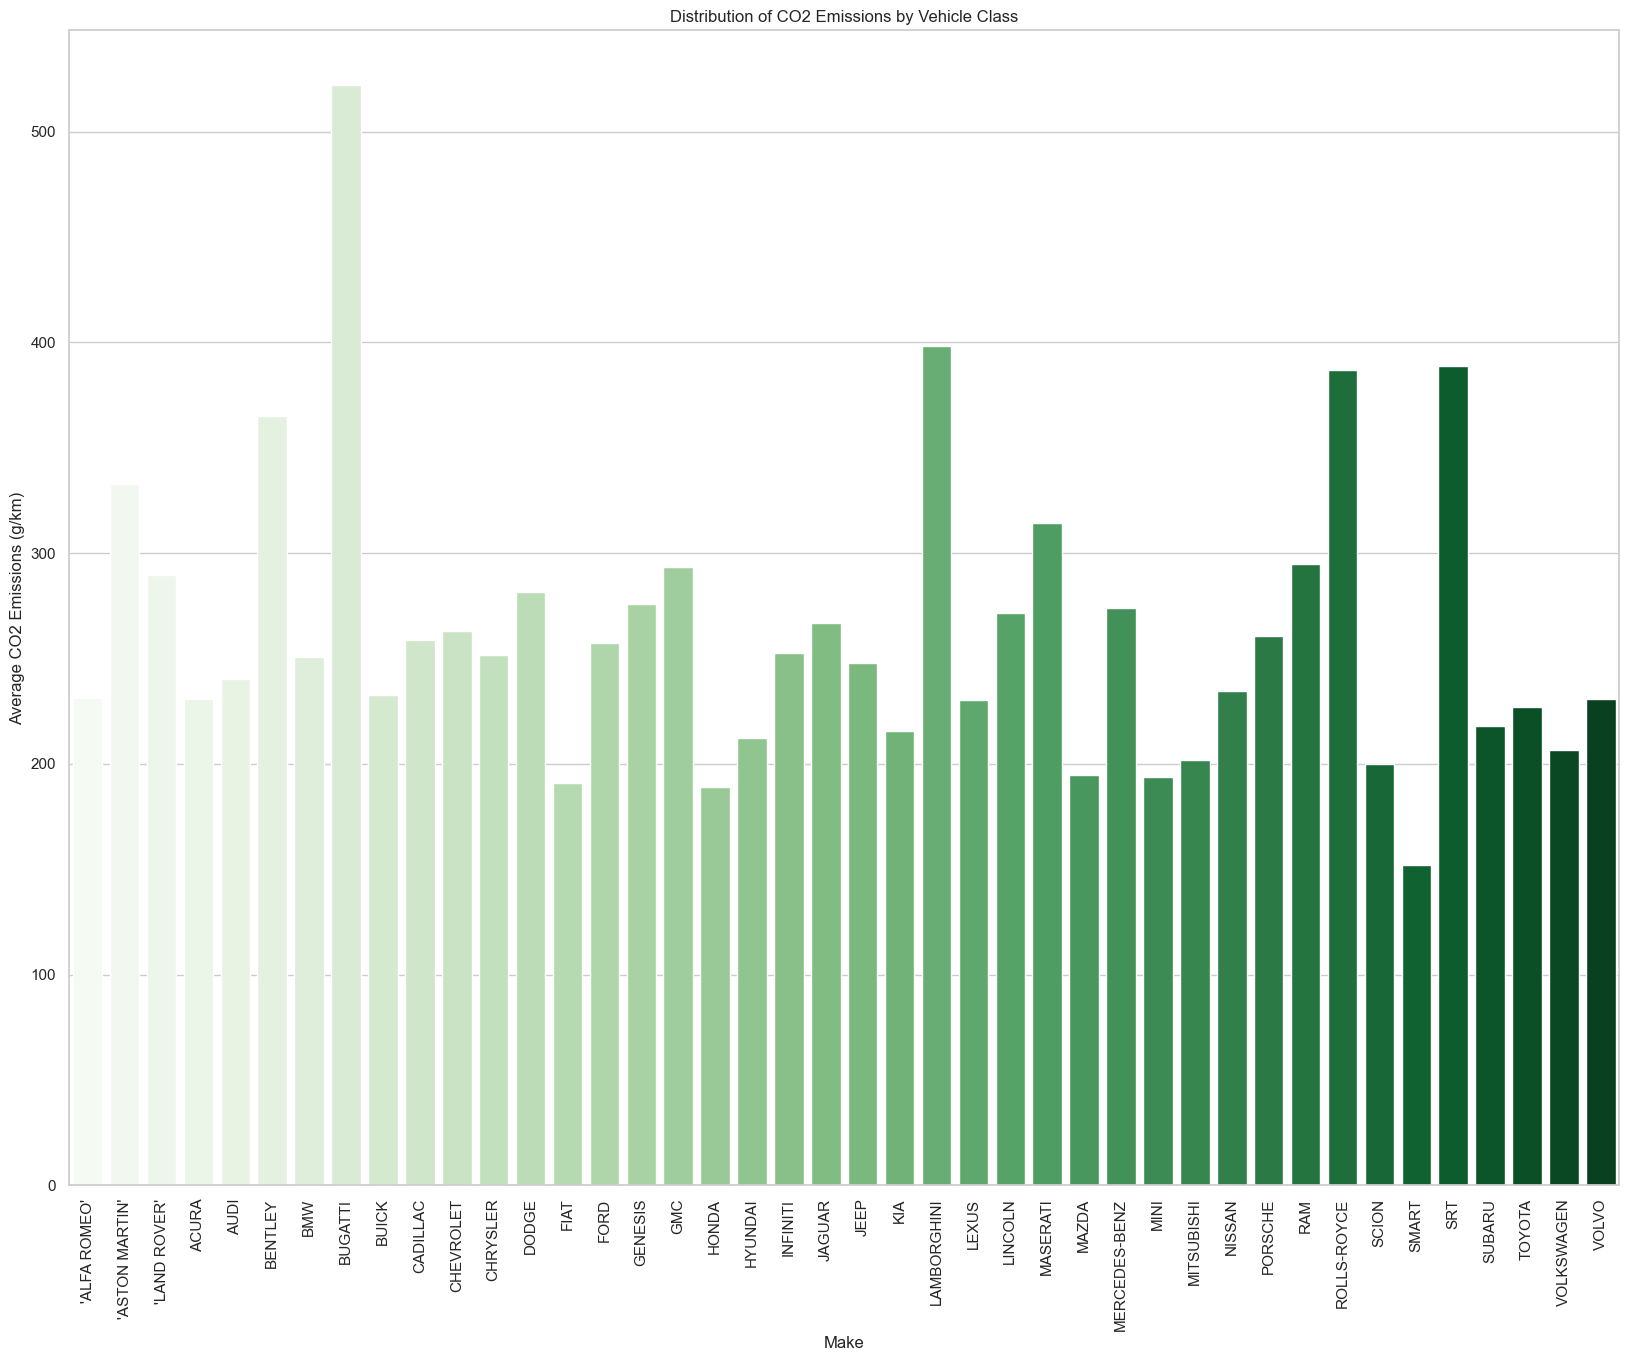

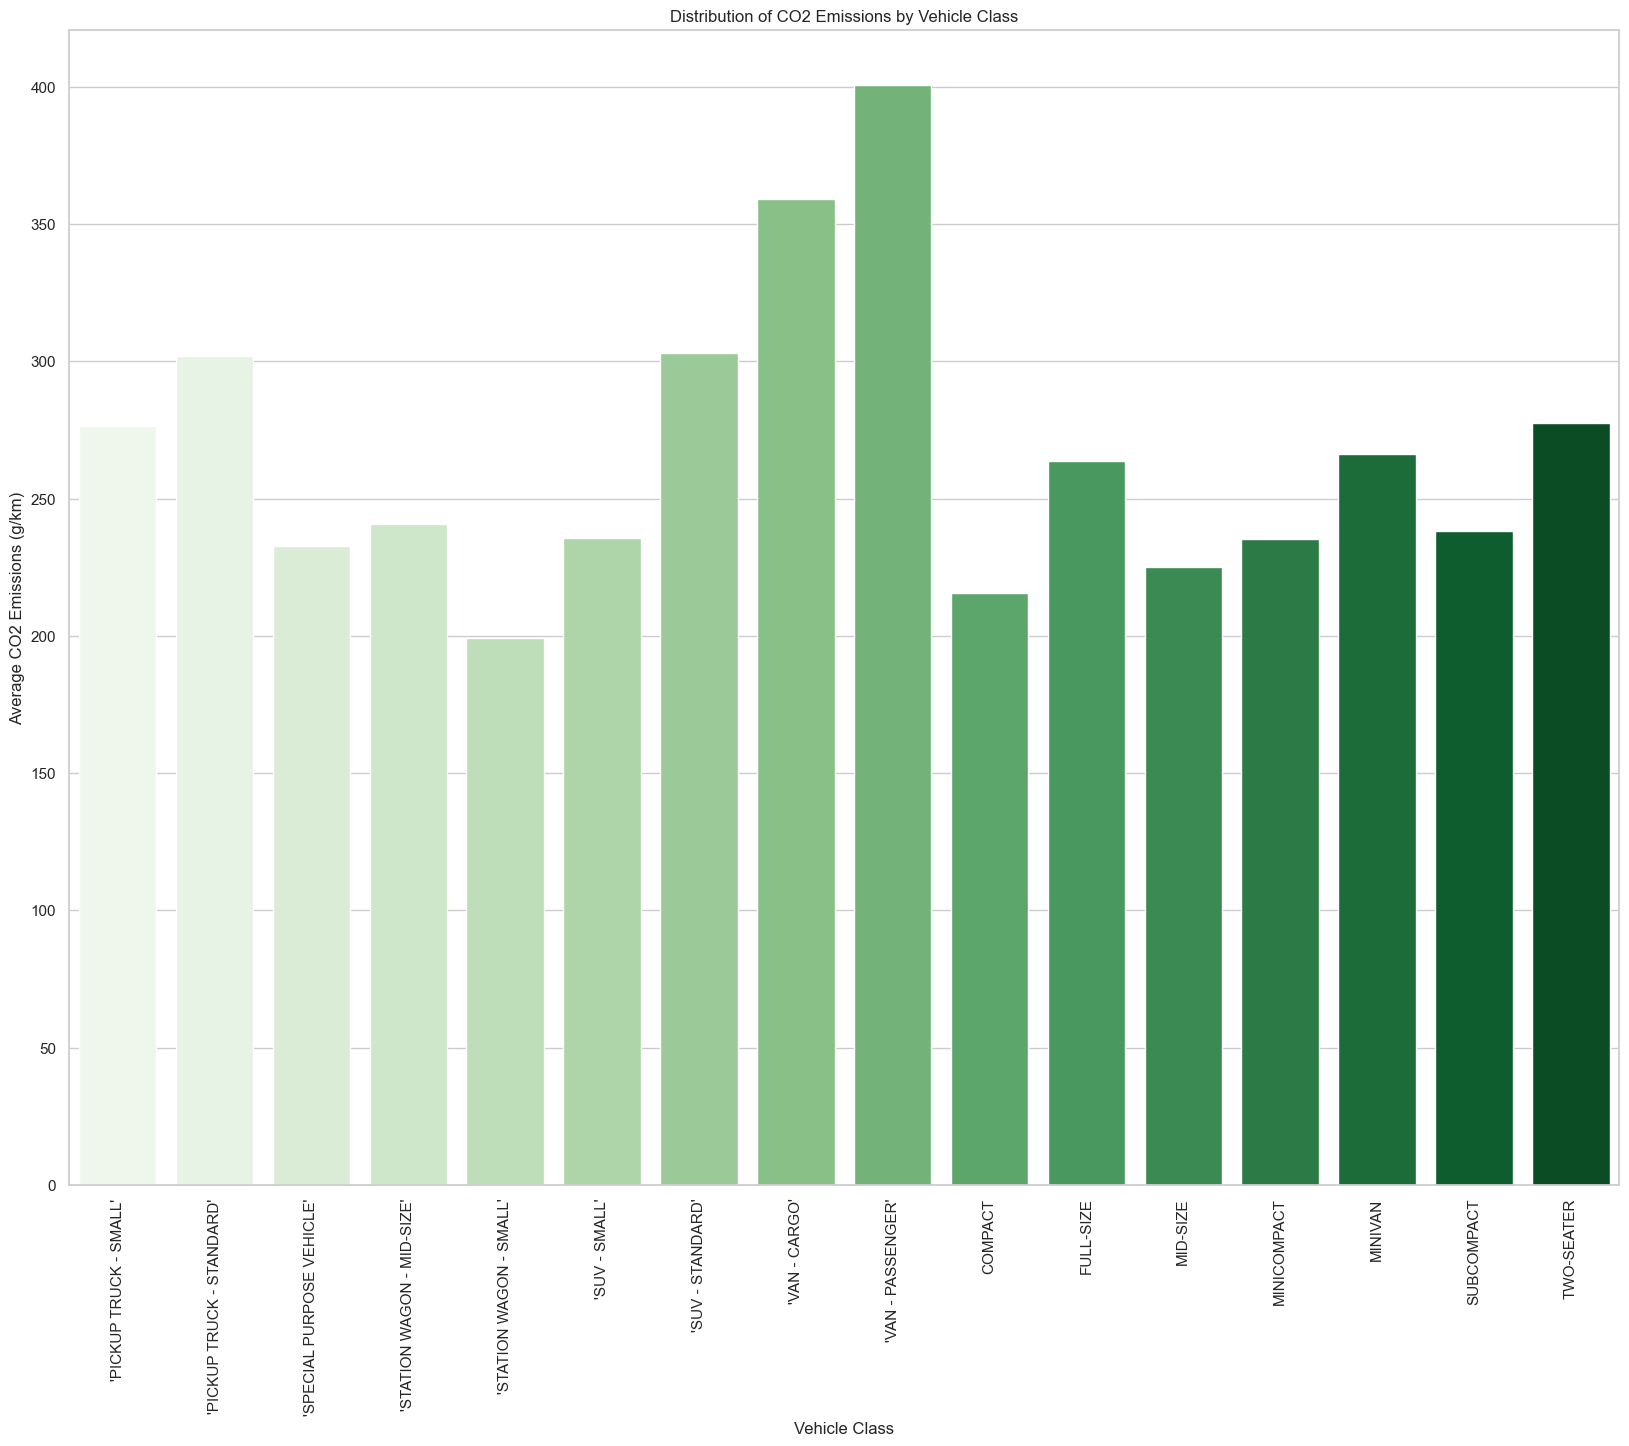

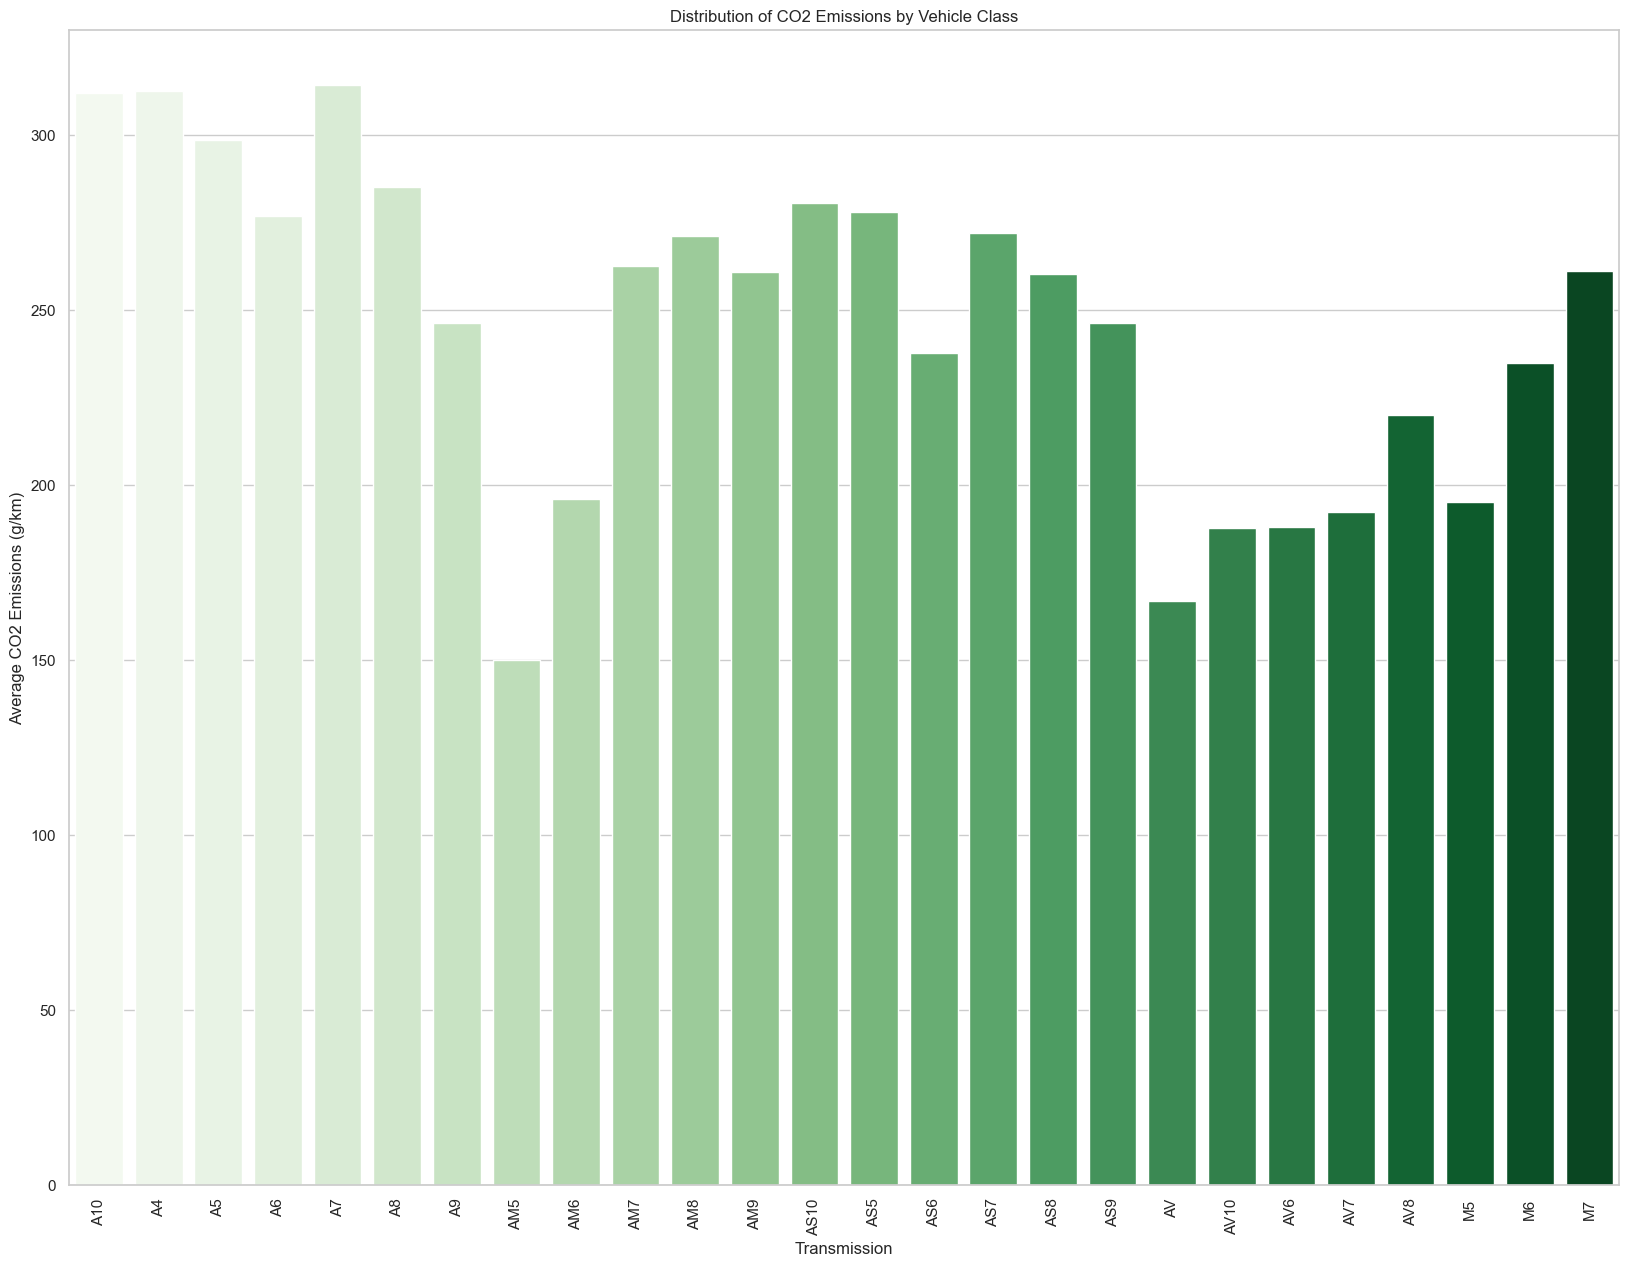

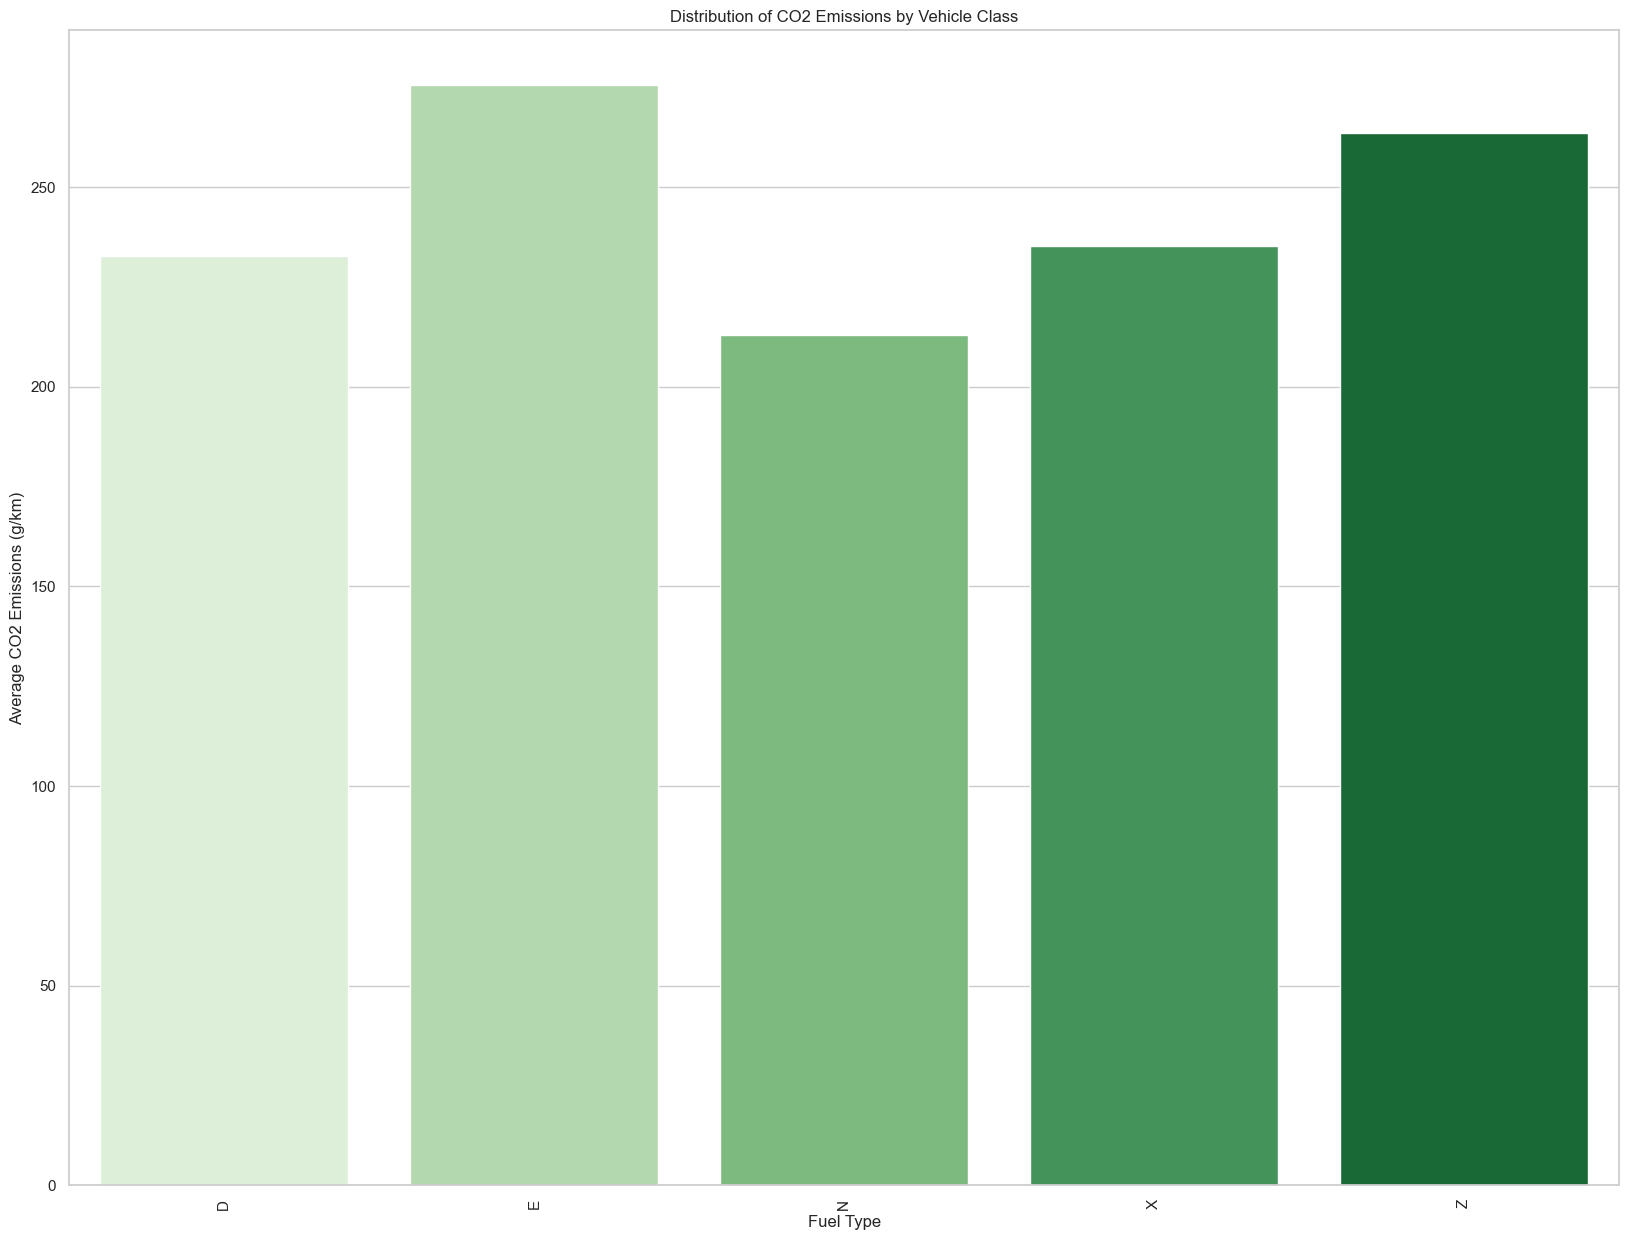

In [11]:
cat_df = df.select_dtypes(include=['object', 'category']).drop(columns=['Model'])
for col_name in cat_df.columns:
    avg_co2_vehicle_class=df.groupby(f"{col_name}")["CO2 Emissions(g/km)"].mean().reset_index()
    plt.figure(figsize=(20, 15))
    sns.barplot(x=f"{col_name}", y="CO2 Emissions(g/km)", data=avg_co2_vehicle_class, palette='Greens')
    plt.xticks(rotation=90)
    plt.title('Distribution of CO2 Emissions by Vehicle Class')
    plt.xlabel(f'{col_name}')
    plt.ylabel('Average CO2 Emissions (g/km)')
    plt.show()

---

**Showing the most and less frequent model names mentioned in the dataset**

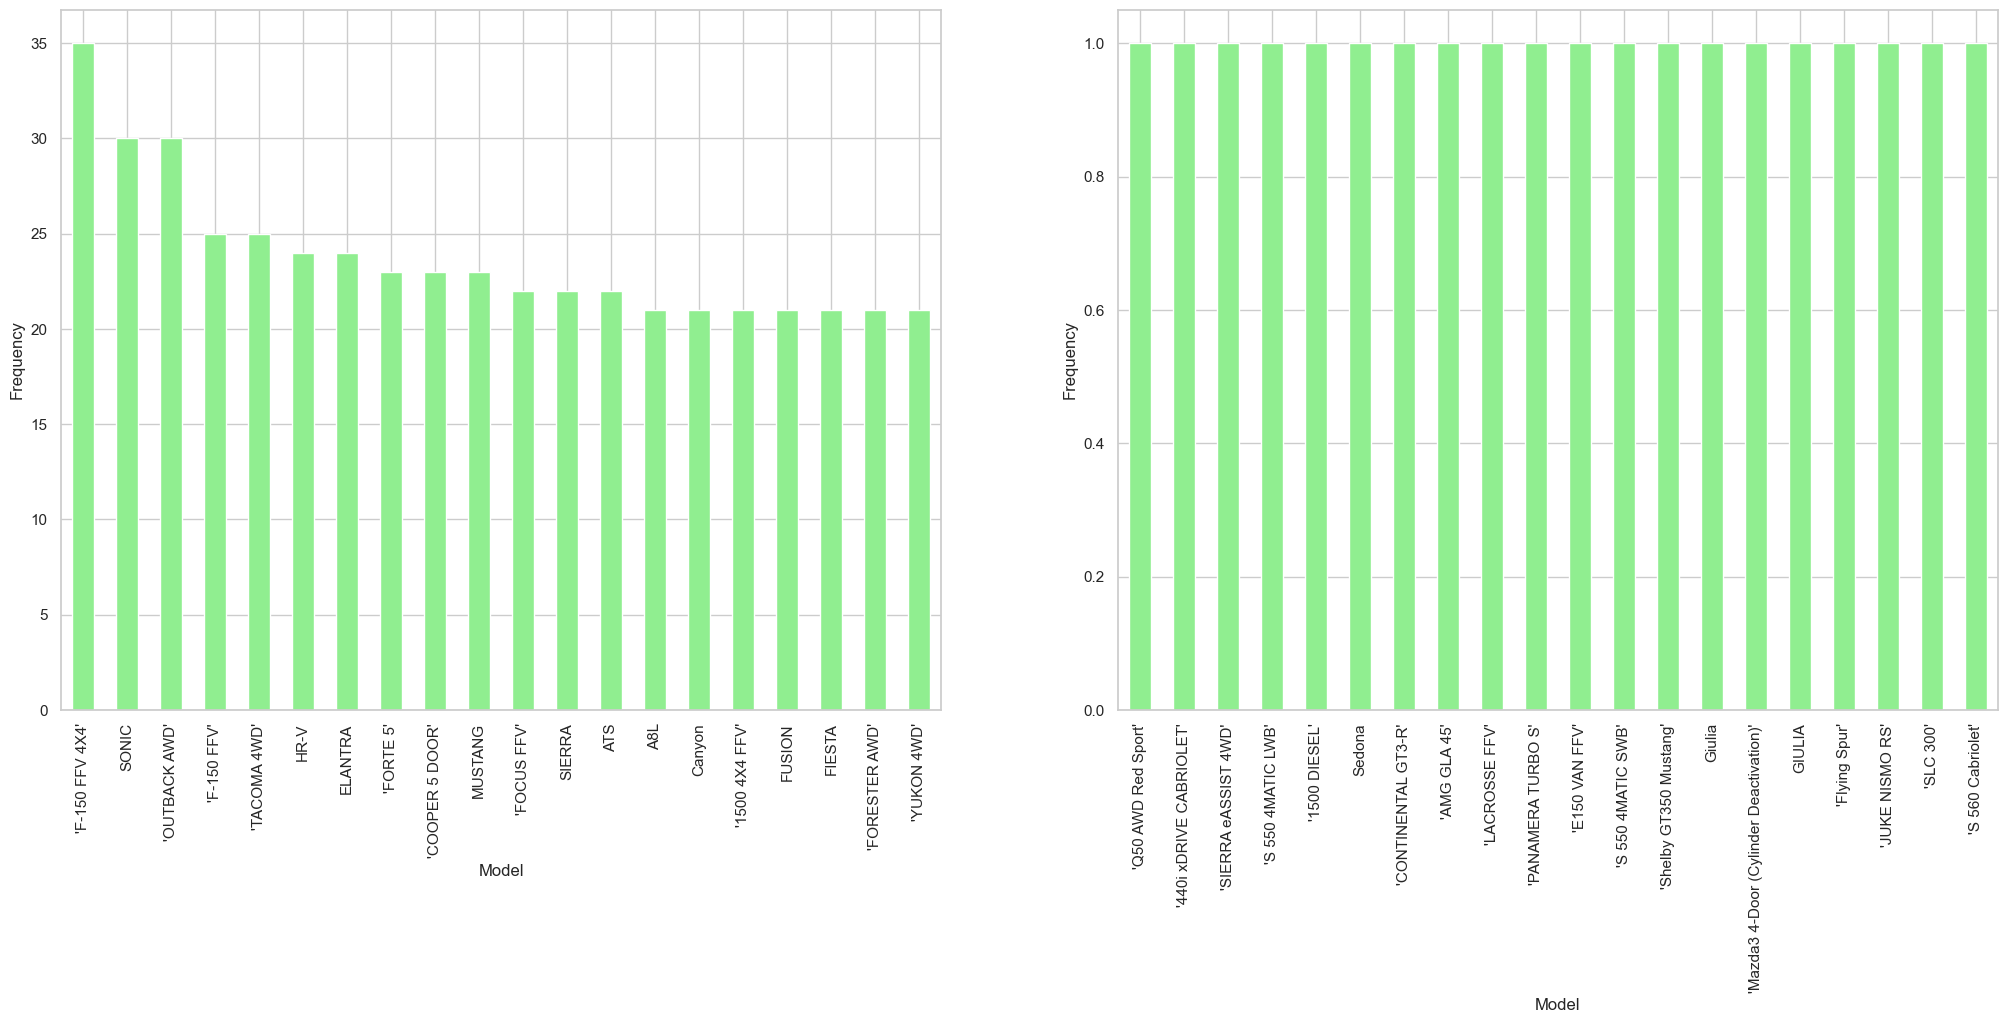

In [12]:
plt.figure(figsize=(25, 20))
plt.subplot(2, 2, 1)
df['Model'].value_counts().head(20).plot(kind='bar', color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
df['Model'].value_counts().tail(20).plot(kind='bar', color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Frequency')
plt.show()

---

**Using box plot to visualize the impact of the categorical columns on the CO2 Emissions**

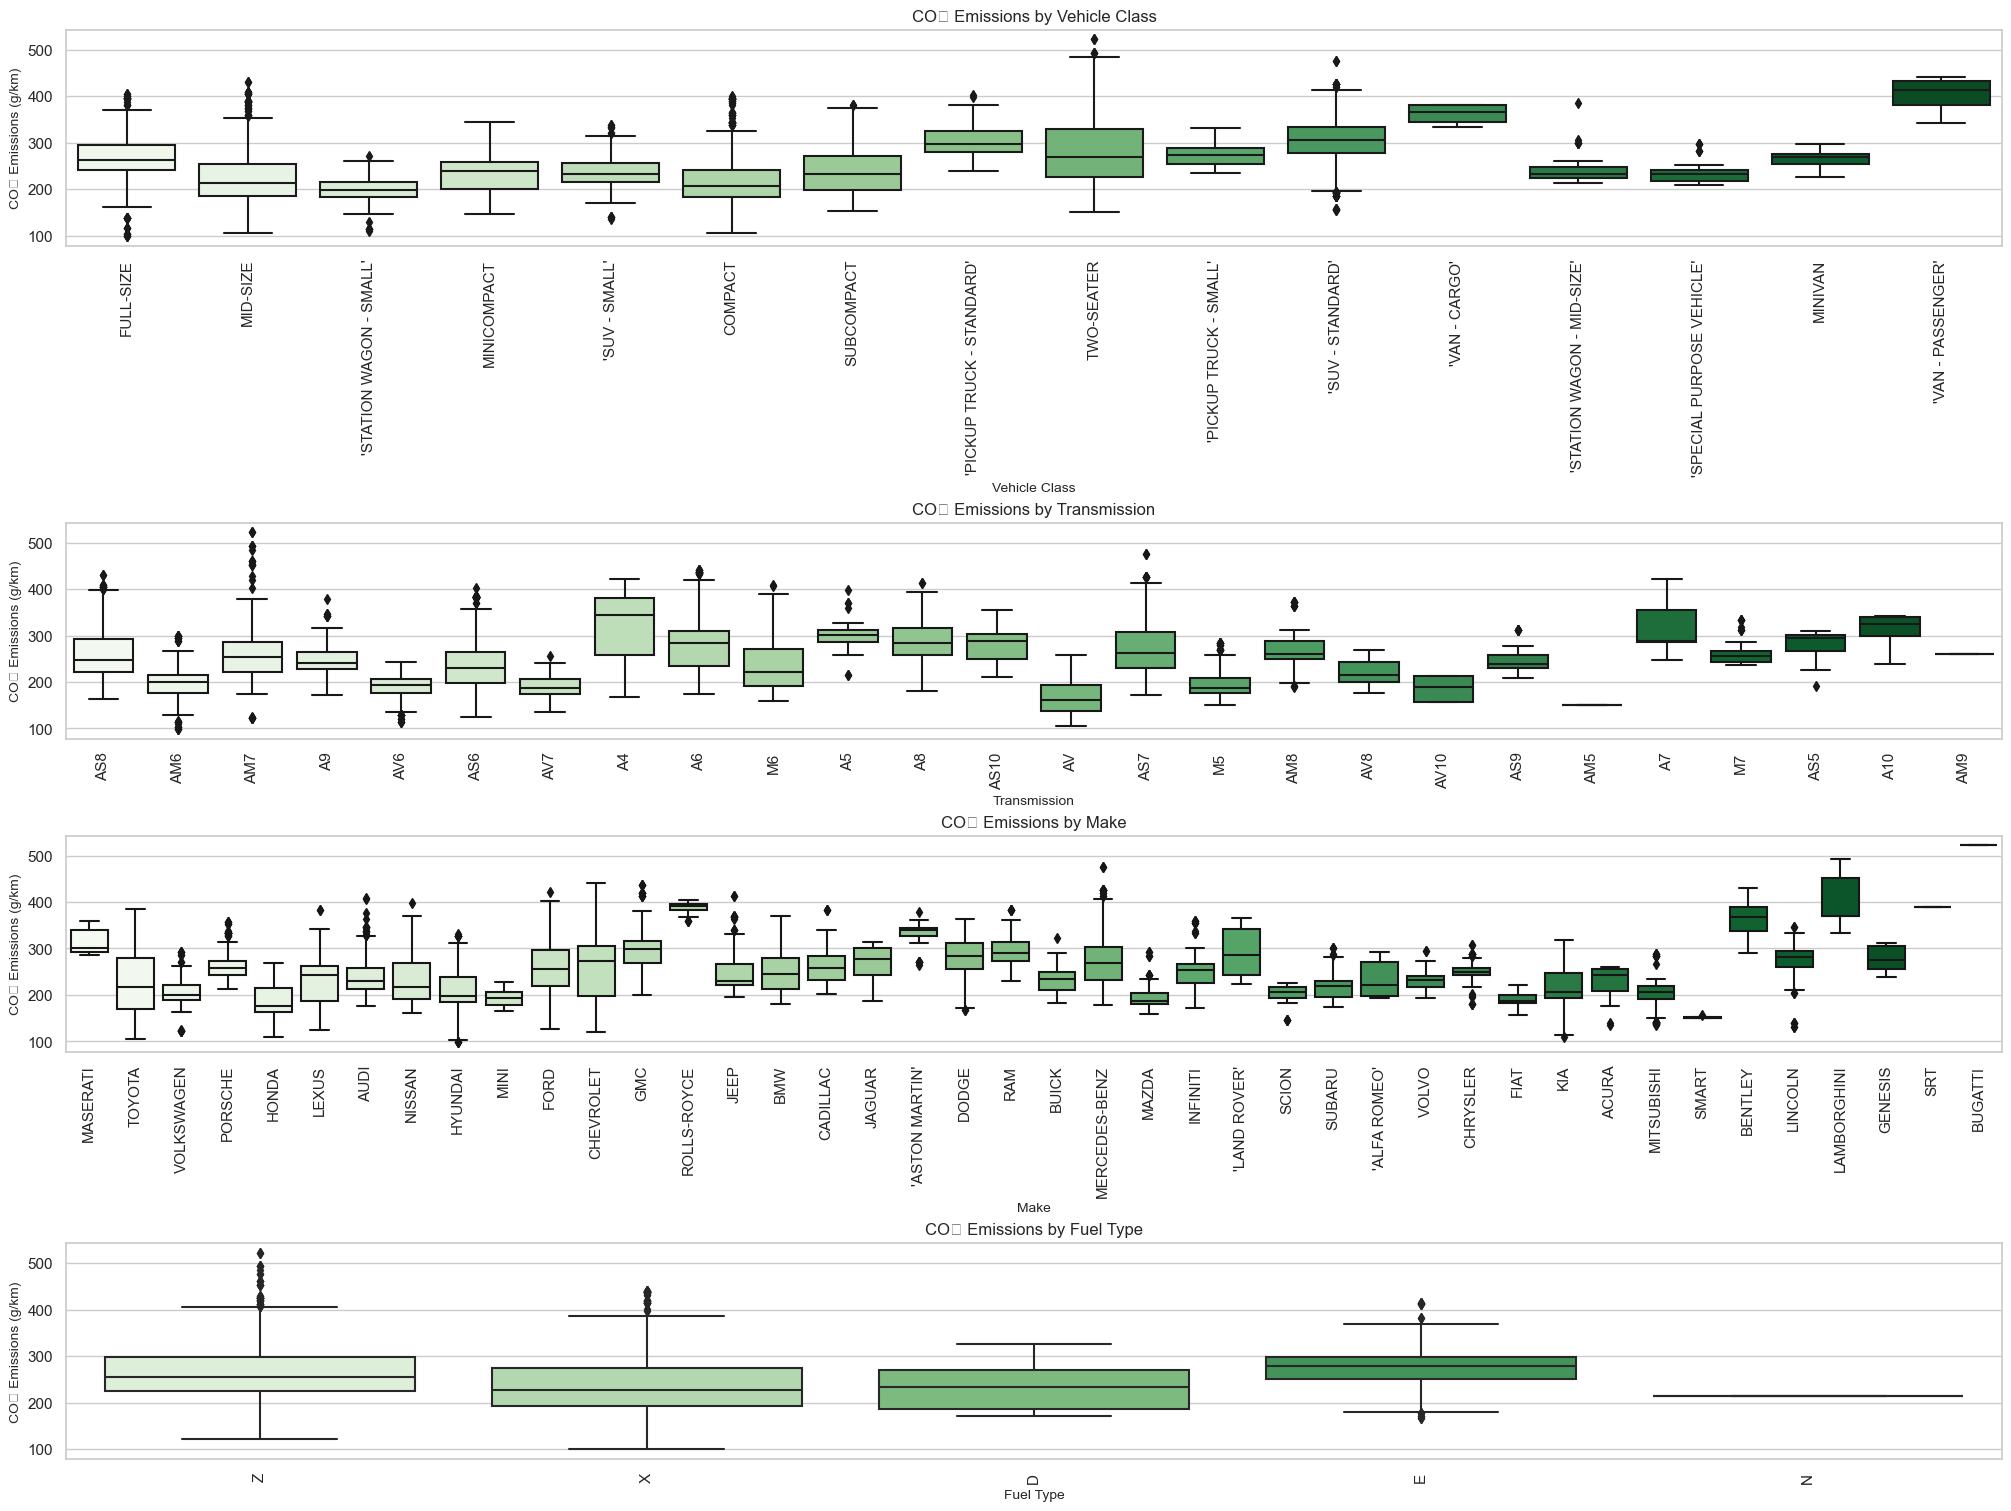

In [13]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
cat_col = ['Vehicle Class', 'Transmission', 'Make', 'Fuel Type']
n_cols = 1
n_rows = -(-len(cat_col) // n_cols) 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(cat_col):
    sns.boxplot(data=df, x=column, y='CO2 Emissions(g/km)' , palette="Greens", ax=axes[i])
    axes[i].set_title(f'CO₂ Emissions by {column}', fontsize=12)
    axes[i].set_xlabel(column.replace('_', ' '), fontsize=10)
    axes[i].set_ylabel('CO₂ Emissions (g/km)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)
plt.show()

---

**Createing a heatmap of correlations to understand how numerical 
features are related to CO₂ Emissions.**

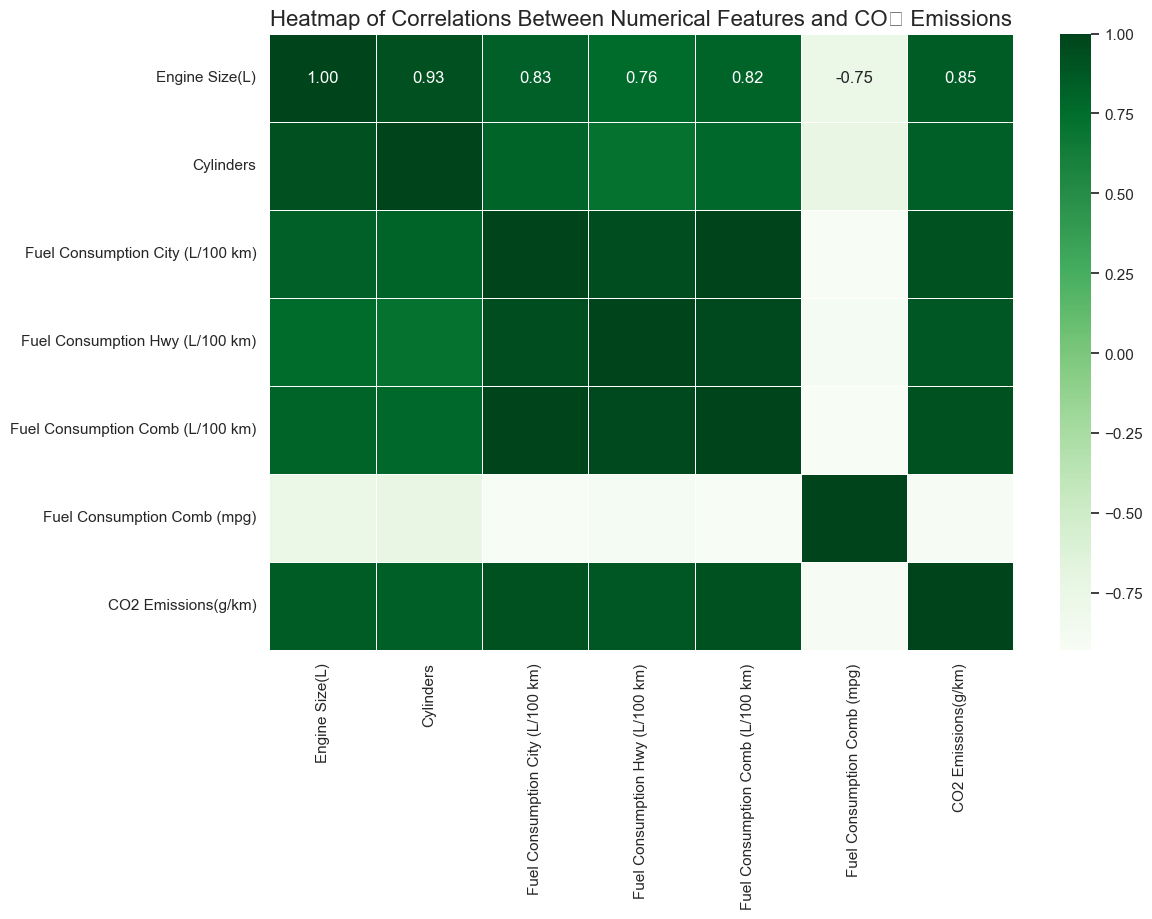

In [14]:
num_d = df.select_dtypes(include=['number'])
correlation_matrix = num_d.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5, cbar=True )
plt.title('Heatmap of Correlations Between Numerical Features and CO₂ Emissions', fontsize=16)
plt.show()

---

#### **2. Feature Insights**

#### **Identifying key features contributing to CO₂ emissions🌱🌍**

*Based on the heatmap, we can determine the impact of all the <span style="background-color: lightgreen; padding: 3px;">numerical columns</span>* 
* **<span style="color:darkgreen ;">Strong Positive Correlations:</span>**<br>
`Fuel Consumption City (L/100 km)`:Correlation of 0.92 means as fuel consumption in the city increases, CO₂ emissions increase significantly.<br>
`Fuel Consumption Comb (L/100 km)`: Correlation of 0.92 shows that combined fuel consumption is highly indicative of CO₂ emissions.<br>
`Fuel Consumption Hwy (L/100 km)`: Correlation of 0.88 ,shows that highway fuel consumption also positively affects CO₂ emissions, but less than city consumption.<br>

* **<span style="color:lightgreen ;">Moderate to Strong Positive Correlations:</span>**<br>
`Engine Size (L)`: Correlation of 0.85 shows that larger engine sizes are associated with higher CO₂ emissions.<br>
`Cylinders`: Correlation of 0.84 meaning vehicles with more cylinders tend to emit more CO₂.<br>

* **<span style="color:gray ;">Strong Negative Correlations:</span>**<br>
`Fuel Consumption Comb (mpg)`: Correlation of -0.91 means higher miles per gallon (better fuel efficiency) results in significantly lower CO₂ emissions.<br>

*Based on the boxplots and the visualizations we made earlier, we can determine which <span style="background-color: lightgreen; padding: 3px;">categorical columns</span>
appear to have the strongest influence on CO₂ emissions.*

- `Vehicle Class`: Is the most effective column the plot shows a wide variation in CO₂ emissions across different vehicle classes which  means more effect on the target variable.
  
- `Transmission`: Is the second impactful feature of the categoricals Since there is some variation in the boxplot, but the difference is less pronounced compared to the vehicle class plot.

- `Make`:While some manufacturers have higher emissions in this column, the spread is significant, suggesting that make is not the most effective factor.

- `Fuel Type`:This column clearly shows distinct groupings in the boxplot, the difference between fuel types is quite pronounced.

- `Model`:This is the least impactful feature which make sense becuse it's only aboute the vehicles model name and the plot does not show any distinct and the difference between models names are extremly low.

---

####  ****<span style="color:darkgreen ;">Summary</span>** of observed trends or patterns**

*The <span style="background-color: lightgreen; padding: 3px;">**most effective columns**</span> influencing CO₂ emissions 🏭🌫️*

**Fuel Consumption City (L/100 km)**:Is one of the most impactful factors on the CO₂ emissions; as fuel consumption in the city increases, CO₂ emissions increase significantly.<br>
**Fuel Consumption Comb (L/100 km)**:As fuel consumption increases (the vehicle uses more liters of fuel per 100 km), CO₂ emissions also increase.<br>
**Fuel Consumption Hwy (L/100 km)**:Higher fuel consumption on highways means more fuel is burned per kilometer, releasing more CO₂..<br>
**Fuel Consumption Comb (mpg)**:higher miles per gallon (better fuel efficiency) results in significantly lower CO₂ emissions.<br>
**Fuel Type**:Certain fuel types (like electric or hybrid) produce much lower CO₂ emissions compared to traditional fuels (like gasoline or diesel).

**Vehicle Class**:Larger vehicles like SUVs, vans, and trucks, have higher emissions compared to smaller vehicles.


<hr style="border-top: 2px solid green;">


**<h1 style="background-color: green; padding: 10px;">Part 2: Regression Analysis</h1>**


---

#### **1. Model Construction**

**Spliting the dataset into training (70%) and testing (30%) subsets.**

In [15]:
from sklearn.model_selection import train_test_split

X = df[['Engine Size(L)','Fuel Consumption Comb (mpg)','Cylinders']]
y = df['CO2 Emissions(g/km)'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30,random_state=100)

---

**Building the Multiple Linear Regression model to predict CO₂ 
Emissions using: Engine Size, Fuel Consumption (Comb), Cylinders.**

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

**Evaluateing model performance using R score and Mean Squared Error (MSE)**

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

r2= r2_score(Y_test, model.predict(X_test))
predicted_labels= model.predict(X_test)
MSE = mean_squared_error(Y_test, predicted_labels)

---

#### **2. Feature Selection:**


**Encoding categorical data**

In [18]:
categorical_data = df.select_dtypes(include=['object', 'category'])
numerical_data = df.select_dtypes(include=['int64', 'float64'])

In [19]:
df_encoded = pd.get_dummies(categorical_data, columns=['Make'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['Vehicle Class'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['Transmission'], drop_first=False)
df_encoded = pd.get_dummies(df_encoded, columns=['Fuel Type'], drop_first=False)

In [20]:
df_encoded = df_encoded.drop(df_encoded.columns[0], axis=1)

In [21]:
df_encoded = pd.concat([numerical_data, df_encoded], axis=1)
df_encoded.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_'ALFA ROMEO',Make_'ASTON MARTIN',Make_'LAND ROVER',...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,3.0,6,14.9,10.3,13.1,22,300,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2.5,4,9.5,7.0,8.4,34,197,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2.0,4,7.6,5.6,6.7,42,180,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.0,6,12.1,9.2,10.8,26,251,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3.5,6,12.5,9.8,11.3,25,265,False,False,False,...,False,False,False,False,False,False,False,False,True,False


___


**Applying feature selection techniques (Forward technique) to 
refine the regression model and rebuilding the model using the selected features.**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df_encoded.drop('CO2 Emissions(g/km)', axis=1)
y = df_encoded['CO2 Emissions(g/km)']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=100)


In [23]:
remaining_features = list(X.columns)
selected_features = []
best_R2 = -float('inf')
best_MSE = float('inf')

In [24]:
while remaining_features:
    r2_scores = [] 
    mse_scores = []  

    for feature in remaining_features:
        temp_features = selected_features + [feature]

        model = LinearRegression()
        X_train_selected = X_train[temp_features]
        X_test_selected = X_test[temp_features]

        model.fit(X_train_selected, Y_train)

        r2_test = model.score(X_test_selected, Y_test)

        predictions = model.predict(X_test_selected)
        mse = mean_squared_error(Y_test, predictions)

        r2_scores.append((r2_test, feature))  
        mse_scores.append((mse, feature))

        #print(f"Feature: {feature}, R2 (Test): {r2_test}, MSE (Test): {mse}")

    r2_scores.sort(reverse=True, key=lambda x: x[0])
    best_r2, best_feature = r2_scores[0]

    mse_scores.sort(key=lambda x: x[0])
    best_mse, best_feature_for_mse = mse_scores[0]

    if best_r2 > best_R2:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_R2 = best_r2
    elif best_mse < best_MSE:
        selected_features.append(best_feature_for_mse)
        remaining_features.remove(best_feature_for_mse)
        best_MSE = best_mse
    else:
        break

---

#### **3. Evaluation Metrics:**


In [25]:
print('R2 for the initial model: ',r2)
print('MSE for the initial model: ',MSE)

R2 for the initial model:  0.9012101562951517
MSE for the initial model:  341.81042434425893


In [26]:
print('R2 for refined model: ',best_R2)
print('MSE for refined model: ',best_mse)

R2 for refined model:  0.9933270186350173
MSE for refined model:  23.088362296129876


---

#### **4. Insights:**

**Compareing the initial and refined regression models based on 
evaluation metrics.**

- The evaluation results for the <span style="background-color: lightgreen; padding: 3px;">first model</span> *using only 3 features (Engine Size,Fuel Consumption (Comb)
Cylinders)*:

`R2:  0.9012101562951517`<br>`MSE:  341.8104243442587`

- The evaluation results for the <span style="background-color: lightgreen; padding: 3px;">second model</span> *using feature selection method ( feature)*:

`R2:23.088362296129674`<br>
`MSE:0.9933270186350175`

which means that using feature selection leads to better accuracy results.

---

**Interpret the impact of key features on CO₂ emissions (e.g., how 
does an increase in engine size affect emissions?).**

<span style="background-color: lightgreen; padding: 3px;">Most impactful features in CO₂ emmissions:</span>

- <span style="color:darkgreen ;">**Numerical :**

Fuel Consumption City (L/100 km),<br>
Fuel Consumption Comb (L/100 km),<br>
Fuel Consumption Hwy (L/100 km),<br>
Fuel Consumption Comb (mpg).

- <span style="color:darkgreen ;">**Categorical**:

Vehicle Class, <br>
Transmission.

---